In [56]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [58]:
cctv = pd.read_csv("seoulCCTV.csv")
pop = pd.read_excel("seoulPopulation.xlsx")

In [59]:
x = cctv.sort_values("소계",ascending=True).reset_index(drop=True)["소계"]
y = cctv.sort_values("소계",ascending=True)["기관명"]

<BarContainer object of 25 artists>

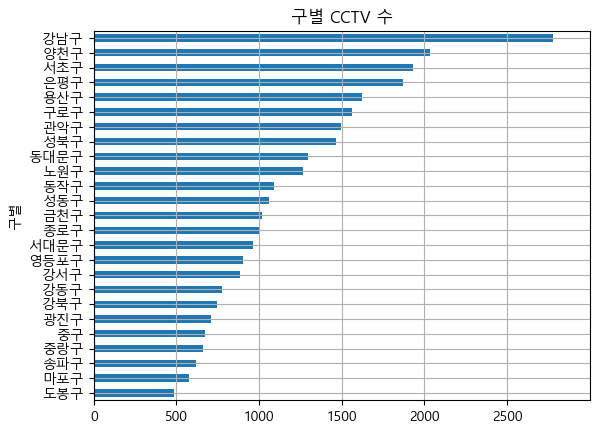

In [60]:
plt.figure()
plt.title("구별 CCTV 수")
plt.grid(True)
plt.ylabel("구별")
plt.xlim(0, 3000)
plt.xticks(range(0, 3000, 500))
plt.margins(0.01)
plt.barh(y, x, height=0.5)

In [61]:
pop.rename(columns={"자치구":"기관명"},inplace=True)
pop2 = pop[['기관명','인구']][3:].reset_index(drop=True)

In [62]:
data = cctv.merge(pop2,on="기관명")

In [63]:
data.drop(data.iloc[:,2:6], axis=1, inplace=True)

In [64]:
data["CCTV비율"] = data["소계"] / data["인구"] * 100

In [65]:
x2 = data.sort_values(by="CCTV비율")["CCTV비율"]
y2 = data.sort_values(by="CCTV비율")["기관명"]

In [66]:
data.iloc[:,1:3] = data.iloc[:,1:3].astype(int)
data.iloc[:,3:] = data.iloc[:,3:].astype(float)

In [67]:
data["인구"] = pd.to_numeric(data["인구"])
data["CCTV비율"] = pd.to_numeric(data["CCTV비율"])

In [68]:
data.dtypes

기관명        object
소계          int64
인구          int64
CCTV비율    float64
dtype: object

<BarContainer object of 25 artists>

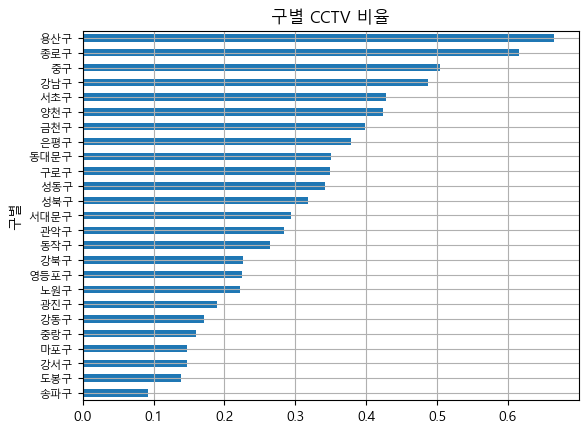

In [69]:
plt.figure()
plt.title("구별 CCTV 비율")
plt.grid(True)
plt.ylabel("구별")
plt.xlim(0, 0.7)
plt.xticks(np.arange(0,0.7,0.1))
plt.yticks(fontsize=8)
plt.margins(0.01)
plt.barh(y2, x2, height=0.5)

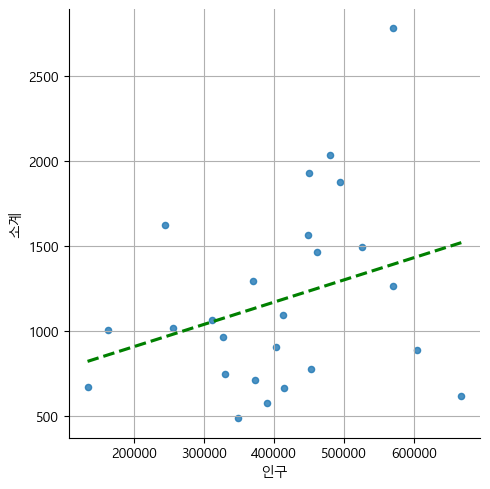

In [70]:

# plt.scatter(data["인구"], data["소계"])
sns.lmplot(data=data, 
           x="인구", 
           y="소계", 
           height=5, 
           palette="viridis", 
           scatter_kws={"s": 20}, 
           ci=None, 
           line_kws={"linestyle": "dashed", "color": "green"})
plt.grid(True)


In [71]:
fp1 = np.polyfit(data["인구"], data["소계"], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)
data["오차"] = np.abs(data["소계"] - f1(data["인구"]))
data

,기관명,소계,인구,CCTV비율,오차
0,강남구,2780,570500,0.487292,1388.055355
1,강동구,773,453233,0.170552,465.422892
2,강북구,748,330192,0.226535,329.342026
3,강서구,884,603772,0.146413,551.503155
4,관악구,1496,525515,0.284673,162.948104
5,광진구,707,372164,0.189970,425.290264
6,구로구,1561,447874,0.348536,329.592918
7,금천구,1015,255082,0.397911,35.989293
8,노원구,1265,569384,0.222170,125.483618
9,도봉구,485,348646,0.139110,616.501341


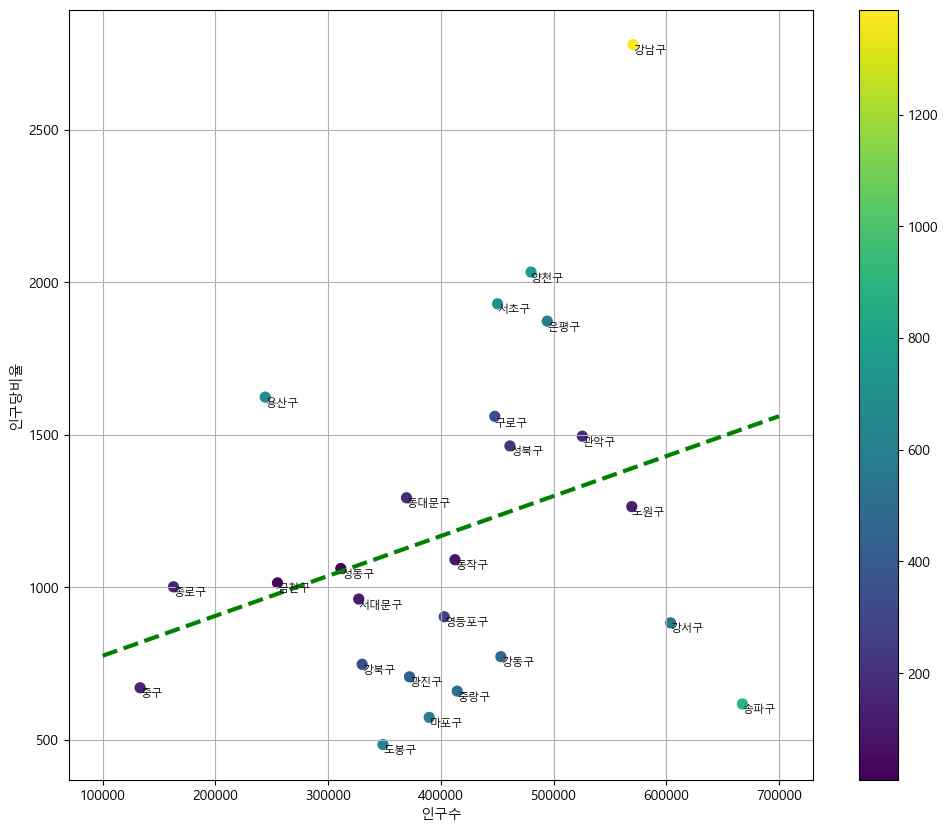

In [72]:
plt.figure(figsize=(12,10))
plt.scatter(data["인구"], data["소계"], c = data["오차"], s=50)
plt.plot(fx, f1(fx), linestyle = "dashed", color = 'g', lw=3)

plt.xlabel("인구수")
plt.ylabel("인구당비율")

for i in range(len(data)):
    plt.text(data["인구"].iloc[i], data["소계"].iloc[i], data["기관명"].iloc[i],
             fontsize=8, color='black', ha='left', va='top')
plt.colorbar()
plt.grid()
plt.show()

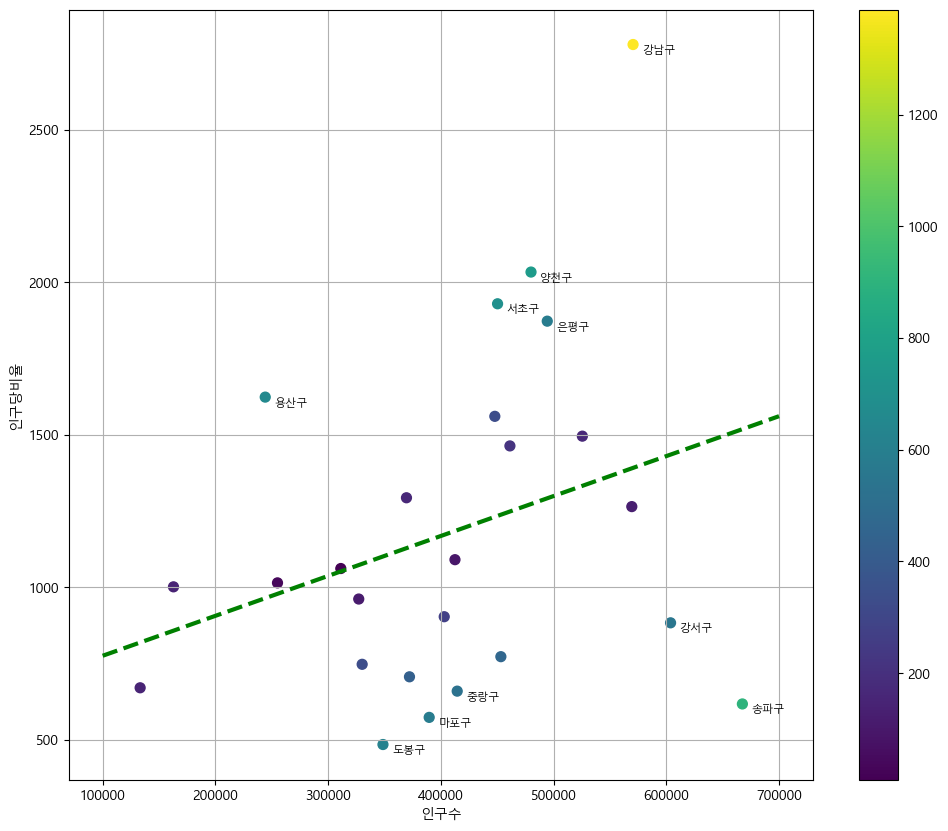

In [73]:
plt.figure(figsize=(12,10))
plt.scatter(data["인구"], data["소계"], c = data["오차"], s=50)
plt.plot(fx, f1(fx), linestyle = "dashed", color = 'g', lw=3)

plt.xlabel("인구수")
plt.ylabel("인구당비율")

for i in data.nlargest(10,"오차").index:
    plt.text(data["인구"].iloc[i] + 8000, data["소계"].iloc[i], data["기관명"].iloc[i],
             fontsize=8, color='black', ha='left', va='top')
plt.colorbar()
plt.grid()
plt.show()

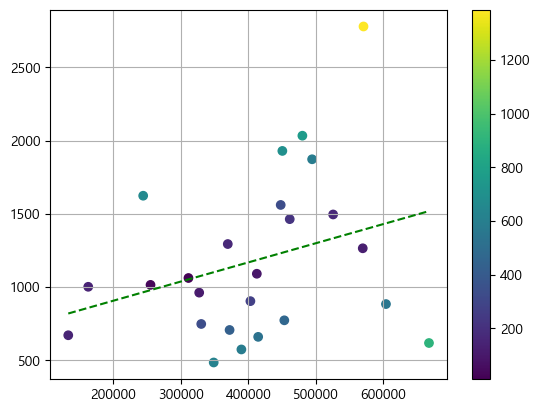

In [74]:
fit_line = np.polyfit(data["인구"], data["소계"], 1)
x_minmax = np.array([min(data["인구"]),max(data["인구"])])
fit_y = x_minmax * fit_line[0] + fit_line[1]

plt.scatter(data["인구"], data["소계"], c=data["오차"])
plt.grid()
plt.plot(x_minmax, fit_y, color="green", linestyle="dashed")
plt.colorbar()